In [1]:
# Import pandas modules
import pandas as pd
import numpy as np
import json
import os
import datetime as dt
import time as time
from time import mktime
import matplotlib.pyplot as plt    
    

In [6]:
# Isolate data items
# Date Range B: Shutdown Operating Period 22nd Dec 2018 - 25th Jan 2019
# Sampled 8 days of the 35 days total
# Time Block: 2pm - 8pm
# Carrier: Delta Airlines (DL)
# Airports: MCO, ATL

# Data Fields: airport code, date, carrier code, 
# Filter by scheduledGateDeparture, actualGateDeparture

# Need catch issue with departure date roll over where departure start time is less than departure end time
# Need to identify duplicate flights across adjacent days
# Example is Historic_Request_ATL_20190122_14.json flight 268

Date_Range_B_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['ATL', 'MCO']
Date_Range_B_Dates = ['20181222', '20181223', '20181224', '20181225','20190122', '20190123', '20190124', '20190125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_B_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_B_Dates:
        Date_Range_B_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_B_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_B_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]


Flight Counter: 1
Airline Flight#: DL365
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T12:20:00.000
Actual Departure: 2018-12-22T16:37:00.000
Flight Departure Delayed by (H:M:S): 4:17:00
Departure Time Delta (minutes): 257.0


Flight Counter: 2
Airline Flight#: DL897
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T12:55:00.000
Actual Departure: 2018-12-22T12:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 3
Airline Flight#: DL1701
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T13:40:00.000
Actual Departure: 2018-12-22T13:53:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 4
Airline Flight#: DL1586
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T13:45:00.000
Actual Departure: 2018-12-22T14:42:00.000
Flight Departure Delayed by (H:M:S): 0:57:00
Departure Time Delta (minutes): 57.0


Flight Counter: 5
Airline Flight

Flight Counter: 101
Airline Flight#: DL1053
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T16:07:00.000
Actual Departure: 2018-12-22T16:14:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 102
Airline Flight#: DL82
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T16:08:00.000
Actual Departure: 2018-12-22T16:32:00.000
Flight Departure Delayed by (H:M:S): 0:24:00
Departure Time Delta (minutes): 24.0


Flight Counter: 103
Airline Flight#: DL1378
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T16:11:00.000
Actual Departure: 2018-12-22T16:15:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 104
Airline Flight#: DL1462
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T16:12:00.000
Actual Departure: 2018-12-22T16:10:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 105
Airline

Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 184
Airline Flight#: DL296
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T18:02:00.000
Actual Departure: 2018-12-22T17:58:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 185
Airline Flight#: DL64
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T18:03:00.000
Actual Departure: 2018-12-22T18:08:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 186
Airline Flight#: DL981
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T18:04:00.000
Actual Departure: 2018-12-22T18:10:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 187
Airline Flight#: DL80
Airport: ATL
Date: 2018-12-22
Scheduled Departure: 2018-12-22T18:06:00.000
Actual Departure: 2018-12-22T18:05:00.000
Flight Departed Early by (H:M:S): 

Flight Counter: 269
Airline Flight#: DL1701
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T13:40:00.000
Actual Departure: 2018-12-23T13:58:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 270
Airline Flight#: DL2369
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T13:48:00.000
Actual Departure: 2018-12-23T13:48:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 271
Airline Flight#: DL2472
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T13:48:00.000
Actual Departure: 2018-12-23T13:54:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 272
Airline Flight#: DL2297
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T13:49:00.000
Actual Departure: 2018-12-23T13:47:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 273
Airline Flight#: DL1272
Air

Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 352
Airline Flight#: DL1530
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:24:00.000
Actual Departure: 2018-12-23T15:35:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 353
Airline Flight#: DL1663
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:25:00.000
Actual Departure: 2018-12-23T15:25:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 354
Airline Flight#: DL765
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:25:00.000
Actual Departure: 2018-12-23T15:40:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 355
Airline Flight#: DL2790
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T15:30:00.000
Actual Departure: 2018-12-23T15:30:00.000
Flight Departed On Time!
Departure Time Delta (

Flight Counter: 433
Airline Flight#: DL2213
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:48:00.000
Actual Departure: 2018-12-23T17:44:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 434
Airline Flight#: DL2430
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:49:00.000
Actual Departure: 2018-12-23T17:47:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 435
Airline Flight#: DL2117
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:49:00.000
Actual Departure: 2018-12-23T17:48:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 436
Airline Flight#: DL14
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T17:50:00.000
Actual Departure: 2018-12-23T17:51:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 437
Airline Flig

Flight Counter: 513
Airline Flight#: DL1172
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T19:29:00.000
Actual Departure: 2018-12-23T19:41:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 514
Airline Flight#: DL2129
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T19:29:00.000
Actual Departure: 2018-12-23T19:27:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 515
Airline Flight#: DL1173
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T19:30:00.000
Actual Departure: 2018-12-23T19:27:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 516
Airline Flight#: DL2186
Airport: ATL
Date: 2018-12-23
Scheduled Departure: 2018-12-23T19:30:00.000
Actual Departure: 2018-12-23T19:29:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 517
Airline F

Departure Time Delta (minutes): -1.0


Flight Counter: 574
Airline Flight#: DL1248
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T14:41:00.000
Actual Departure: 2018-12-24T14:36:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 575
Airline Flight#: DL742
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T14:42:00.000
Actual Departure: 2018-12-24T14:43:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 576
Airline Flight#: DL2506
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T14:55:00.000
Actual Departure: 2018-12-24T14:53:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 577
Airline Flight#: DL2709
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T14:55:00.000
Actual Departure: 2018-12-24T14:55:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Count

Flight Counter: 652
Airline Flight#: DL744
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T17:09:00.000
Actual Departure: 2018-12-24T17:06:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 653
Airline Flight#: DL1293
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T17:20:00.000
Actual Departure: 2018-12-24T17:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 654
Airline Flight#: DL1685
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T17:29:00.000
Actual Departure: 2018-12-24T17:27:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 655
Airline Flight#: DL916
Airport: ATL
Date: 2018-12-24
Scheduled Departure: 2018-12-24T17:31:00.000
Actual Departure: 2018-12-24T17:26:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 656
Airline Flight

Flight Counter: 728
Airline Flight#: DL2270
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T13:48:00.000
Actual Departure: 2018-12-25T13:43:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 729
Airline Flight#: DL1820
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T13:51:00.000
Actual Departure: 2018-12-25T13:48:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 730
Airline Flight#: DL1513
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T13:54:00.000
Actual Departure: 2018-12-25T13:53:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 731
Airline Flight#: DL991
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T13:54:00.000
Actual Departure: 2018-12-25T13:55:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 732
Airline Fli

Departure Time Delta (minutes): -4.0


Flight Counter: 796
Airline Flight#: DL1053
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T16:07:00.000
Actual Departure: 2018-12-25T16:05:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 797
Airline Flight#: DL82
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T16:08:00.000
Actual Departure: 2018-12-25T16:29:00.000
Flight Departure Delayed by (H:M:S): 0:21:00
Departure Time Delta (minutes): 21.0


Flight Counter: 798
Airline Flight#: DL2221
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T16:20:00.000
Actual Departure: 2018-12-25T16:18:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 799
Airline Flight#: DL1650
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T16:20:00.000
Actual Departure: 2018-12-25T16:16:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes):

Flight Counter: 885
Airline Flight#: DL355
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T18:54:00.000
Actual Departure: 2018-12-25T18:54:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 886
Airline Flight#: DL2131
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T18:55:00.000
Actual Departure: 2018-12-25T19:07:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 887
Airline Flight#: DL1476
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T19:00:00.000
Actual Departure: 2018-12-25T18:58:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 888
Airline Flight#: DL1309
Airport: ATL
Date: 2018-12-25
Scheduled Departure: 2018-12-25T19:01:00.000
Actual Departure: 2018-12-25T18:59:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 889
Airline Flight#: DL830
Airport

Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:25:00.000
Actual Departure: 2019-01-22T14:25:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 963
Airline Flight#: DL1317
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:26:00.000
Actual Departure: 2019-01-22T14:23:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 964
Airline Flight#: DL2389
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:30:00.000
Actual Departure: 2019-01-22T14:30:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 965
Airline Flight#: DL1178
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:30:00.000
Actual Departure: 2019-01-22T14:29:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 966
Airline Flight#: DL2876
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:30:00.000
Actual Dep

Flight Counter: 1048
Airline Flight#: DL827
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:13:00.000
Actual Departure: 2019-01-22T16:10:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1049
Airline Flight#: DL2055
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:20:00.000
Actual Departure: 2019-01-22T16:51:00.000
Flight Departure Delayed by (H:M:S): 0:31:00
Departure Time Delta (minutes): 31.0


Flight Counter: 1050
Airline Flight#: DL1412
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:21:00.000
Actual Departure: 2019-01-22T16:17:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1051
Airline Flight#: DL480
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:21:00.000
Actual Departure: 2019-01-22T16:18:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1052
Airlin

Departure Time Delta (minutes): 45.0


Flight Counter: 1129
Airline Flight#: DL1120
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:59:00.000
Actual Departure: 2019-01-22T17:57:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1130
Airline Flight#: DL1867
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:59:00.000
Actual Departure: 2019-01-22T17:57:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1131
Airline Flight#: DL61
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:00:00.000
Actual Departure: 2019-01-22T17:52:00.000
Flight Departed Early by (H:M:S): 0:08:00
Departure Time Delta (minutes): -8.0


Flight Counter: 1132
Airline Flight#: DL1871
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:01:00.000
Actual Departure: 2019-01-22T17:59:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes)

Flight Counter: 1217
Airline Flight#: DL396
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T20:03:00.000
Actual Departure: 2019-01-22T20:00:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1218
Airline Flight#: DL2673
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T11:04:00.000
Actual Departure: 2019-01-23T11:58:00.000
Flight Departure Delayed by (H:M:S): 0:54:00
Departure Time Delta (minutes): 54.0


Flight Counter: 1219
Airline Flight#: DL2011
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T12:14:00.000
Actual Departure: 2019-01-23T14:22:00.000
Flight Departure Delayed by (H:M:S): 2:08:00
Departure Time Delta (minutes): 128.0


Flight Counter: 1220
Airline Flight#: DL1675
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T12:59:00.000
Actual Departure: 2019-01-23T13:44:00.000
Flight Departure Delayed by (H:M:S): 0:45:00
Departure Time Delta (minutes): 45.0


Flight Counter: 122

Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:07:00.000
Actual Departure: 2019-01-23T15:08:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1296
Airline Flight#: DL2359
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:08:00.000
Actual Departure: 2019-01-23T15:06:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1297
Airline Flight#: DL2845
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:09:00.000
Actual Departure: 2019-01-23T15:15:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1298
Airline Flight#: DL1925
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:10:00.000
Actual Departure: 2019-01-23T15:10:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1299
Airline Flight#: DL2801
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-0

Actual Departure: 2019-01-23T16:57:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1385
Airline Flight#: DL383
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:01:00.000
Actual Departure: 2019-01-23T17:07:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1386
Airline Flight#: DL1997
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:02:00.000
Actual Departure: 2019-01-23T16:59:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1387
Airline Flight#: DL1791
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:08:00.000
Actual Departure: 2019-01-23T17:02:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1388
Airline Flight#: DL1075
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:10:00.000
Actual Departure: 2019-01-2


Flight Counter: 1462
Airline Flight#: DL2265
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:00:00.000
Actual Departure: 2019-01-23T18:50:00.000
Flight Departed Early by (H:M:S): 0:10:00
Departure Time Delta (minutes): -10.0


Flight Counter: 1463
Airline Flight#: DL1524
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:00:00.000
Actual Departure: 2019-01-23T19:44:00.000
Flight Departure Delayed by (H:M:S): 0:44:00
Departure Time Delta (minutes): 44.0


Flight Counter: 1464
Airline Flight#: DL1435
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:01:00.000
Actual Departure: 2019-01-23T20:26:00.000
Flight Departure Delayed by (H:M:S): 1:25:00
Departure Time Delta (minutes): 85.0


Flight Counter: 1465
Airline Flight#: DL2290
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:02:00.000
Actual Departure: 2019-01-24T05:58:00.000
Flight Departure Delayed by (H:M:S): 10:56:00
Departure Time Delta (minutes): 656.0


Flight Counter:

Flight Counter: 1544
Airline Flight#: DL2819
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:02:00.000
Actual Departure: 2019-01-24T14:33:00.000
Flight Departure Delayed by (H:M:S): 0:31:00
Departure Time Delta (minutes): 31.0


Flight Counter: 1545
Airline Flight#: DL1534
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:02:00.000
Actual Departure: 2019-01-24T14:19:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departure Time Delta (minutes): 17.0


Flight Counter: 1546
Airline Flight#: DL2982
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:04:00.000
Actual Departure: 2019-01-24T14:41:00.000
Flight Departure Delayed by (H:M:S): 0:37:00
Departure Time Delta (minutes): 37.0


Flight Counter: 1547
Airline Flight#: DL2447
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:04:00.000
Actual Departure: 2019-01-24T14:04:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1548
Airline Flight#: D

Flight Counter: 1627
Airline Flight#: DL1887
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:38:00.000
Actual Departure: 2019-01-24T15:43:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 1628
Airline Flight#: DL1837
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:40:00.000
Actual Departure: 2019-01-24T15:37:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1629
Airline Flight#: DL889
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:44:00.000
Actual Departure: 2019-01-24T15:44:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1630
Airline Flight#: DL2451
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:45:00.000
Actual Departure: 2019-01-24T15:43:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1631
Airline Flight#: DL336
Air

Flight Counter: 1690
Airline Flight#: DL383
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:01:00.000
Actual Departure: 2019-01-24T16:59:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1691
Airline Flight#: DL1997
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:02:00.000
Actual Departure: 2019-01-24T16:59:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1692
Airline Flight#: DL1791
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:08:00.000
Actual Departure: 2019-01-24T17:03:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1693
Airline Flight#: DL1075
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:10:00.000
Actual Departure: 2019-01-24T17:22:00.000
Flight Departure Delayed by (H:M:S): 0:12:00
Departure Time Delta (minutes): 12.0


Flight Counter: 1694
Airli

Flight Counter: 1772
Airline Flight#: DL2265
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:00:00.000
Actual Departure: 2019-01-24T18:54:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 1773
Airline Flight#: DL1435
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:01:00.000
Actual Departure: 2019-01-24T19:23:00.000
Flight Departure Delayed by (H:M:S): 0:22:00
Departure Time Delta (minutes): 22.0


Flight Counter: 1774
Airline Flight#: DL2290
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:02:00.000
Actual Departure: 2019-01-24T18:58:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1775
Airline Flight#: DL1293
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:03:00.000
Actual Departure: 2019-01-24T19:01:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1776
Airl

Scheduled Departure: 2019-01-25T14:02:00.000
Actual Departure: 2019-01-25T15:25:00.000
Flight Departure Delayed by (H:M:S): 1:23:00
Departure Time Delta (minutes): 83.0


Flight Counter: 1851
Airline Flight#: DL2819
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:02:00.000
Actual Departure: 2019-01-25T14:07:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 1852
Airline Flight#: DL2982
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:04:00.000
Actual Departure: 2019-01-25T14:09:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 1853
Airline Flight#: DL2447
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:04:00.000
Actual Departure: 2019-01-25T14:03:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1854
Airline Flight#: DL2887
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 

Flight Counter: 1925
Airline Flight#: DL2139
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:25:00.000
Actual Departure: 2019-01-25T15:31:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1926
Airline Flight#: DL2149
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:25:00.000
Actual Departure: 2019-01-25T15:42:00.000
Flight Departure Delayed by (H:M:S): 0:17:00
Departure Time Delta (minutes): 17.0


Flight Counter: 1927
Airline Flight#: DL1181
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:29:00.000
Actual Departure: 2019-01-25T16:25:00.000
Flight Departure Delayed by (H:M:S): 0:56:00
Departure Time Delta (minutes): 56.0


Flight Counter: 1928
Airline Flight#: DL2223
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:30:00.000
Actual Departure: 2019-01-25T15:30:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1929
Airline Flight#: DL

Flight Counter: 2006
Airline Flight#: DL296
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:25:00.000
Actual Departure: 2019-01-25T17:36:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 2007
Airline Flight#: DL946
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:29:00.000
Actual Departure: 2019-01-25T18:01:00.000
Flight Departure Delayed by (H:M:S): 0:32:00
Departure Time Delta (minutes): 32.0


Flight Counter: 2008
Airline Flight#: DL2392
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:30:00.000
Actual Departure: 2019-01-25T17:30:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 2009
Airline Flight#: DL2784
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:30:00.000
Actual Departure: 2019-01-25T17:30:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 2010
Airline Flight#: DL2951
Airport: ATL
Date: 

Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:46:00.000
Actual Departure: 2019-01-25T18:45:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 2073
Airline Flight#: DL2008
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:48:00.000
Actual Departure: 2019-01-25T18:54:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 2074
Airline Flight#: DL1190
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:49:00.000
Actual Departure: 2019-01-25T18:48:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 2075
Airline Flight#: DL1542
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:50:00.000
Actual Departure: 2019-01-25T18:54:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 2076
Airline Flight#: DL1155
Airport: ATL
Date: 2019-01-25
Schedul

Flight Counter: 2159
Airline Flight#: DL1358
Airport: MCO
Date: 2018-12-23
Scheduled Departure: 2018-12-23T12:25:00.000
Actual Departure: 2018-12-23T14:44:00.000
Flight Departure Delayed by (H:M:S): 2:19:00
Departure Time Delta (minutes): 139.0


Flight Counter: 2160
Airline Flight#: DL2312
Airport: MCO
Date: 2018-12-23
Scheduled Departure: 2018-12-23T13:25:00.000
Actual Departure: 2018-12-23T14:14:00.000
Flight Departure Delayed by (H:M:S): 0:49:00
Departure Time Delta (minutes): 49.0


Flight Counter: 2161
Airline Flight#: DL2758
Airport: MCO
Date: 2018-12-23
Scheduled Departure: 2018-12-23T14:25:00.000
Actual Departure: 2018-12-23T14:26:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 2162
Airline Flight#: DL1058
Airport: MCO
Date: 2018-12-23
Scheduled Departure: 2018-12-23T14:25:00.000
Actual Departure: 2018-12-23T15:57:00.000
Flight Departure Delayed by (H:M:S): 1:32:00
Departure Time Delta (minutes): 92.0


Flight Counter: 

Departure Time Delta (minutes): 207.0


Flight Counter: 2239
Airline Flight#: DL1080
Airport: MCO
Date: 2019-01-23
Scheduled Departure: 2019-01-23T13:25:00.000
Actual Departure: 2019-01-23T13:51:00.000
Flight Departure Delayed by (H:M:S): 0:26:00
Departure Time Delta (minutes): 26.0


Flight Counter: 2240
Airline Flight#: DL1083
Airport: MCO
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:25:00.000
Actual Departure: 2019-01-23T19:36:00.000
Flight Departure Delayed by (H:M:S): 5:11:00
Departure Time Delta (minutes): 311.0


Flight Counter: 2241
Airline Flight#: DL1083
Airport: MCO
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:25:00.000
Actual Departure: 2019-01-23T21:31:00.000
Flight Departure Delayed by (H:M:S): 7:06:00
Departure Time Delta (minutes): 426.0


Flight Counter: 2242
Airline Flight#: DL1761
Airport: MCO
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:26:00.000
Actual Departure: 2019-01-23T14:20:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time D

In [7]:
# Summarize Date Range B
print(f"\nDeparture Summary for Date Range B\n")

Sum_Early = (Date_Range_B_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_B_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_B_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_B_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_B_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_B_Summary_table = pd.DataFrame(Date_Range_B_Summary_data)

Date_Range_B_Summary_table.head()







Departure Summary for Date Range B

Total Departures Early: 1111
Total Departures On Time: 227
Total Departures Delayed: 974
Total Departures: 2312



,Early,On Time,Delayed
0,1111,227,974


In [8]:
# Describe Date Range B
Date_Range_B_df.describe()



,Delay
count,2312.000000
mean,12.047578
std,41.850855
min,-16.000000
25%,-3.000000
50%,0.000000
75%,10.000000
max,656.000000


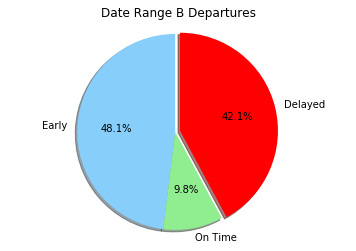

In [9]:
# Plot Date Range B Departures

Date_Range_B_Summary = [Sum_Early, Sum_On_Time, Sum_Delays]
Date_Range_B_Labels = ["Early", "On Time", "Delayed"]
colors = ["lightskyblue", "lightgreen", "red"]
explode = (0, 0, 0.05)

plt.title("Date Range B Departures")
plt.pie(Date_Range_B_Summary, autopct="%1.1f%%", explode=explode, labels=Date_Range_B_Labels, colors=colors, shadow=True, startangle=90)
plt.axis("equal")
plt.show()


In [227]:
# Compare total number of flights, average flights per day

# Plot average delay by hour in a random day during Date Range A
# Plot average delay by hour in a random day during Date Range B